### (1) 경사하강법으로 단순 선형회귀 학습하여 모델 만들기

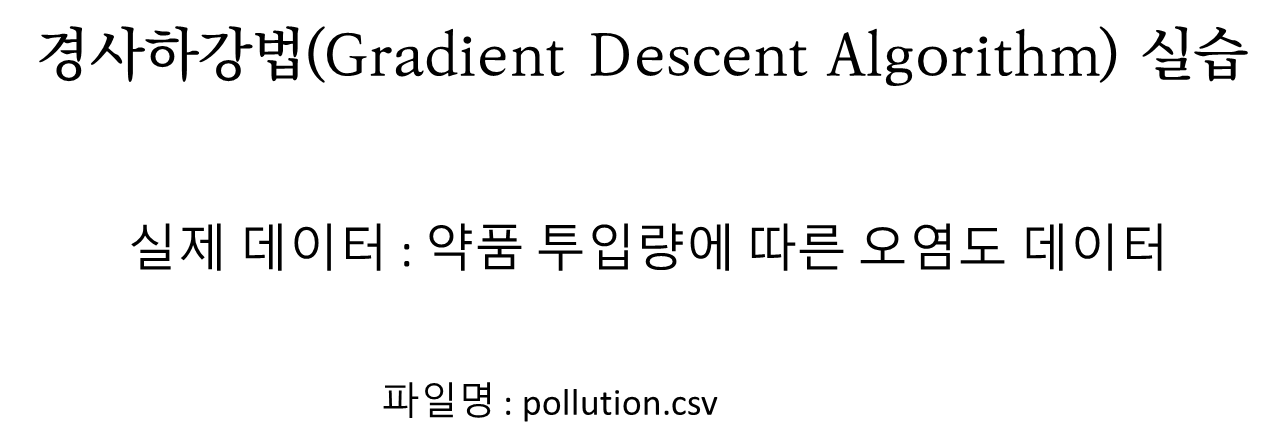

In [1]:
#########################################################################
## 단순 선형회귀 연습문제 : poluuion.csv 데이터 (경사하강법 구현)
#########################################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lin_data = pd.read_csv('../data/pollution.csv') # 데이터 파일 이름
lin_data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


In [15]:
X = lin_data['input']
Y = lin_data['pollution']

## 하이퍼파라미터 초기값 설정
a, b = 1, 1
learning_rate = 0.1
epochs = 1000

def h(a, b, X):   # 가설함수 (모델)
    return a * X + b

def mse(a, b, X, Y): # 손실함수 (mse)
    return np.mean((h(a, b, X) - Y) ** 2)


In [5]:
((a * X + b) - Y)**2

0     13.091323
1     10.965111
2     10.456184
3      5.536955
4      5.736061
        ...    
95    14.294396
96    14.879504
97    19.168741
98    21.660229
99     3.529722
Length: 100, dtype: float64

epoch: 0 loss: 8.550844396227838 a: 1.119320379237933 b: 1.5531777723425213


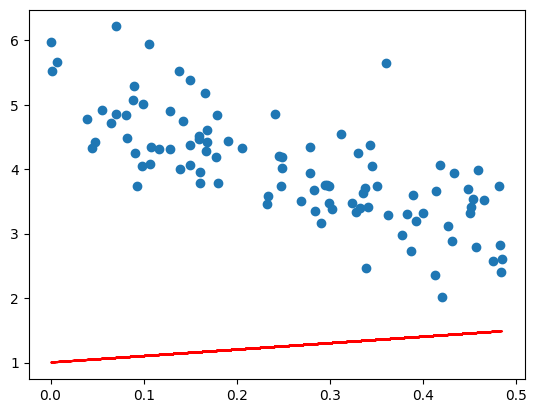

epoch: 500 loss: 0.32971940420438 a: -3.5288911108726193 b: 4.912556165679646


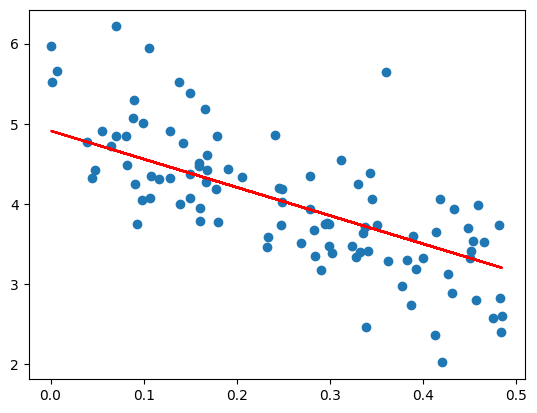

epoch: 1000 loss: 0.3102627729776528 a: -4.377783084081573 b: 5.132339829958857


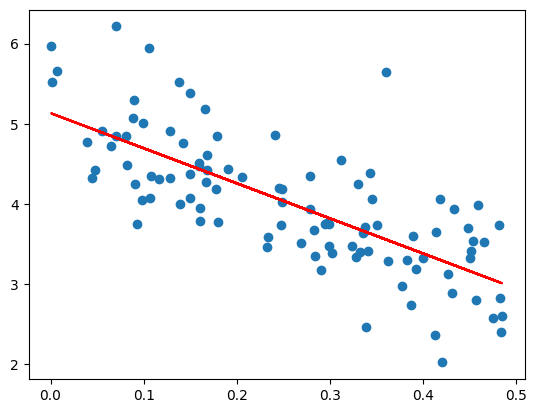

In [16]:

 # 학습 기록 저장할 리스트
loss_list, a_list, b_list, da_list, db_list = [], [], [], [], []

# # 경사 하강법 학습 #####################
for i in range(epochs + 1):
    Y_hat = h(a, b, X)
    loss = mse(a, b, X, Y)
    # 미분값 계산
    error = Y_hat - Y
    dloss_da = 2 * (error * X).mean()
    dloss_db = 2 * error.mean()
    
    # 학습 데이터 기록
    loss_list.append(loss)
    a_list.append(a)
    b_list.append(b)
    da_list.append(dloss_da)
    db_list.append(dloss_db)
    
    # 경사하강법으로 a, b 업데이트
    a = a - learning_rate * dloss_da
    b = b - learning_rate * dloss_db    
    
    if i % 500 == 0:
        print('epoch:', i, 'loss:', loss, 'a:', a, 'b:', b)        
        plt.scatter(X, Y)
        plt.plot(X, Y_hat, 'r') # 예측값
        plt.show()

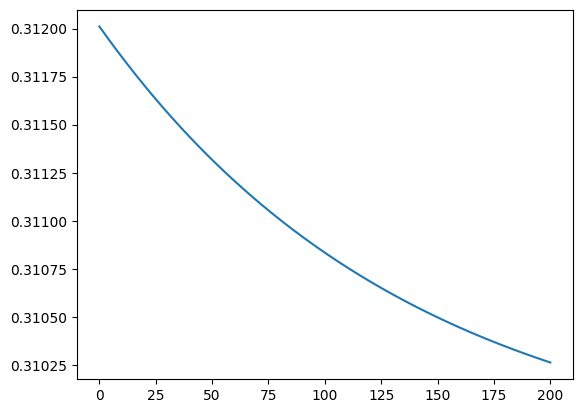

In [ ]:
plt.plot(loss_list[800:])

epoch: 0 loss: 8.550844396227838 a: 1.119320379237933 b: 1.5531777723425213


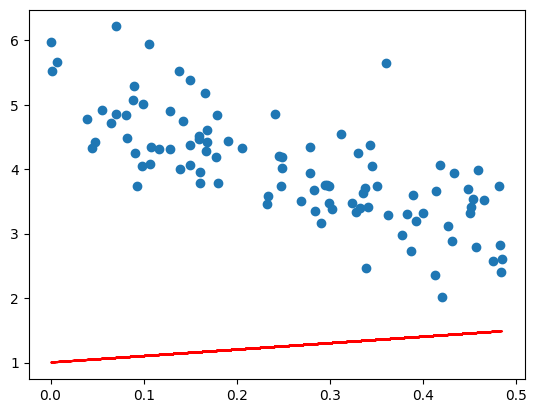

epoch: 500 loss: 0.32971940420438 a: -3.5288911108726193 b: 4.912556165679646


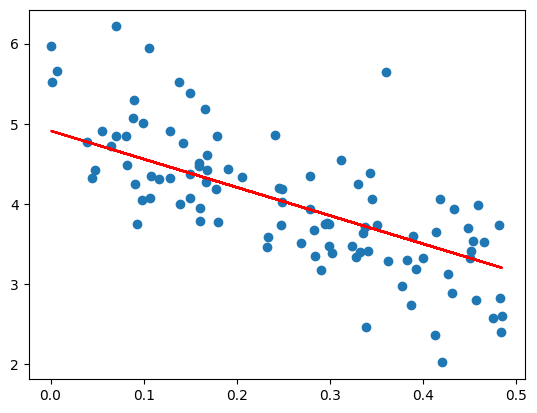

epoch: 1000 loss: 0.3102627729776528 a: -4.377783084081573 b: 5.132339829958857


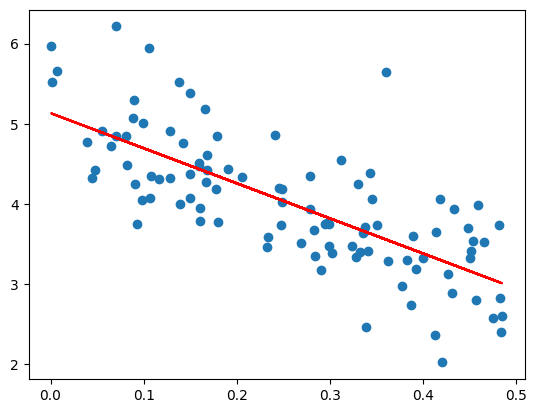

In [18]:
#########################################################################
## 단순 선형회귀 연습문제 : poluuion.csv 데이터 (경사하강법 구현)
#########################################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lin_data = pd.read_csv('../data/pollution.csv') # 데이터 파일 이름

## 하이퍼파라미터 초기값 설정
a, b = 1, 1
learning_rate = 0.1
epochs = 1000

X = lin_data['input']
Y = lin_data['pollution']

def h(a, b, X):   # 가설함수 (모델)
    return a * X + b

def mse(a, b, X, Y): # 손실함수
    return np.mean((h(a, b, X) - Y)**2)

 # 학습 기록 저장할 리스트
loss_list, a_list, b_list, da_list, db_list = [], [], [], [], []

# # 경사 하강법 학습 #####################
for i in range(epochs + 1):
    Y_hat = h(a, b, X)
    loss = mse(a, b, X, Y)
    # 미분값 계산
    dloss_da = 2 * ((Y_hat - Y) * X).mean()
    dloss_db = 2 * (Y_hat - Y).mean()
    
    # 학습 데이터 기록
    loss_list.append(loss)
    a_list.append(a)
    b_list.append(b)
    da_list.append(dloss_da)
    db_list.append(dloss_db)
    
    # 경사하강법으로 a, b 업데이트
    a = a - learning_rate * dloss_da
    b = b - learning_rate * dloss_db    
    
    if i % 500 == 0:
        print('epoch:', i, 'loss:', loss, 'a:', a, 'b:', b)        
        plt.scatter(X, Y)
        plt.plot(X, Y_hat, 'r') # 예측값
        plt.show()

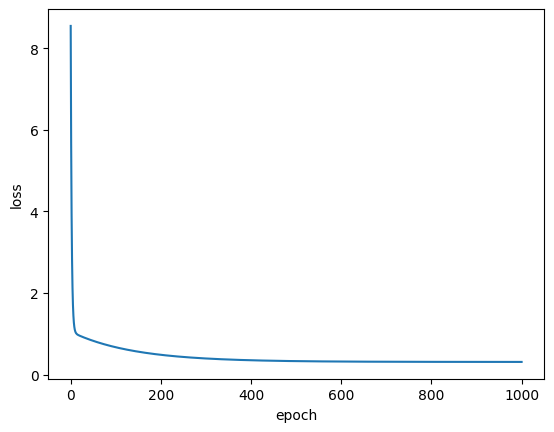

In [19]:
## 손실함수 그래프
plt.plot(loss_list, label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

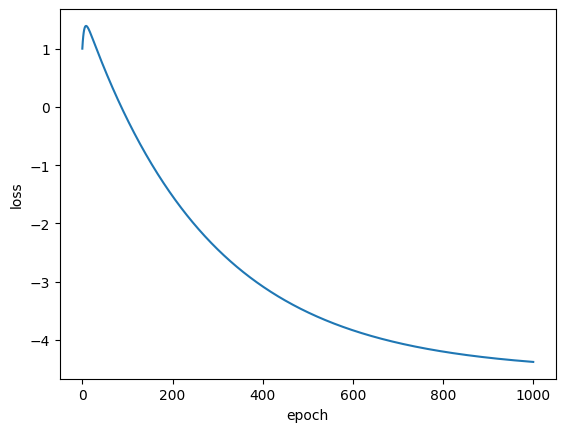

In [20]:
### (2) 회귀계수 시각화
plt.plot(a_list, label='a')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

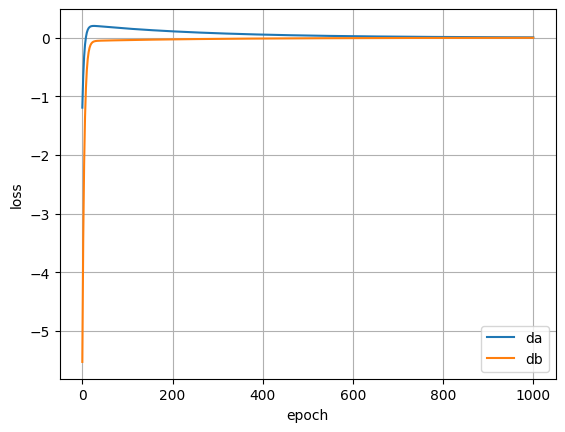

In [21]:
### (3) 회귀계수 변화율 시각화
plt.plot(da_list, label='da')
plt.plot(db_list, label='db')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

### (2) Scikit Learn으로 학습

In [ ]:
#########################################################################
## 단순 선형회귀 연습문제 : poluuion.csv 데이터 (scikit-learn 사용)
#########################################################################
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lin_data = pd.read_csv('../data/pollution.csv') # 데이터 파일 이름

lr = LinearRegression()
X = lin_data['input'].values.reshape(-1, 1)   # 2차원 배열로 변환 (100, 1)
Y = lin_data['pollution']
lr.fit(X, Y)
lr.coef_, lr.intercept_

(array([-4.54449866]), np.float64(5.17550358024579))

In [23]:
## 약품을 10 투입할 때 오염도 예측
lr.predict([[11]]), h(a, b, np.array([11.]))

(array([-44.81398173]), array([-43.02327409]))

In [24]:
lr.score(X, Y)  # 결정계수 R^2  

0.5617634020619926

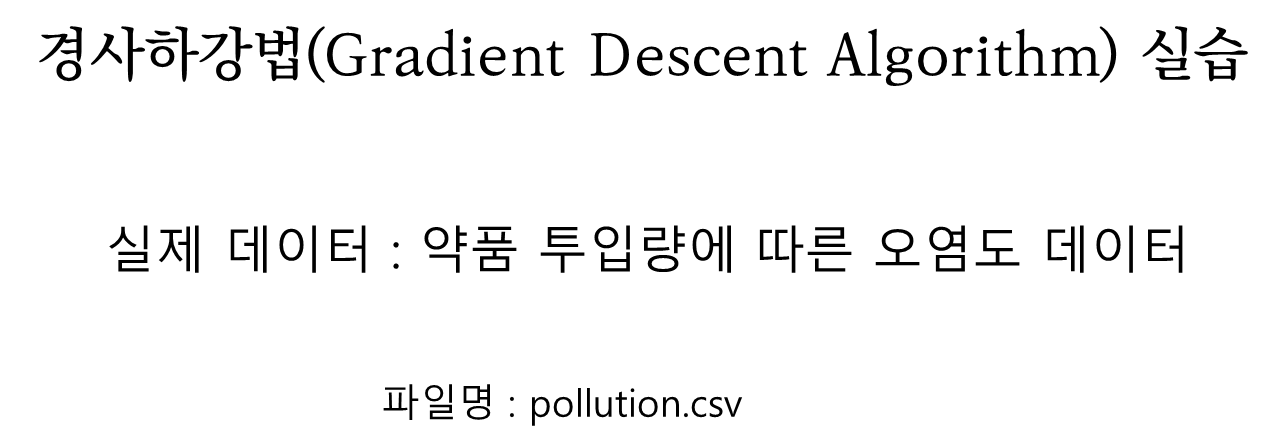

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 저장 위치
lin_data = pd.read_csv('../data/pollution.csv') # 데이터 파일 이름
lin_data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


<Axes: xlabel='input', ylabel='pollution'>

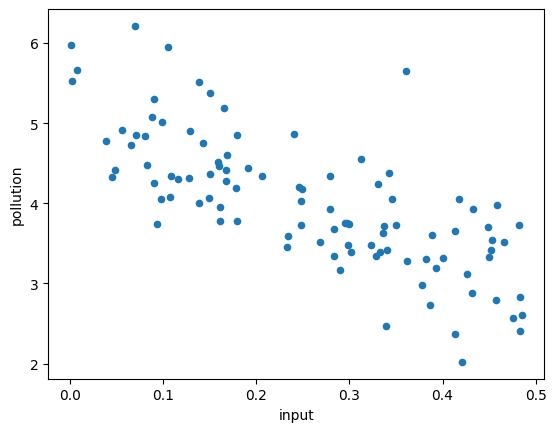

In [26]:
lin_data.plot(kind='scatter', x='input', y='pollution')
# lin_data.plot.scatter(x='input', y='pollution')

In [27]:
lin_data.input.max()

np.float64(0.4849026075901378)

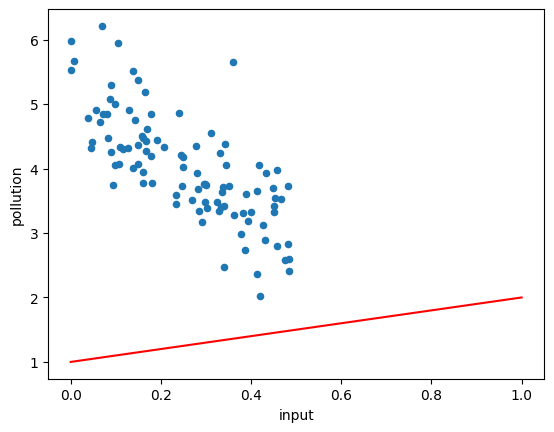

In [28]:
## 임의의 가설 시각화
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x, w, b):       # 가설에 따라 값을 계산하는 함수 
    return w*x + b

# 데이터(산포도)와 가설(직선)을 비교 
lin_data.plot(kind='scatter', x='input', y='pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)], "r")
plt.show()

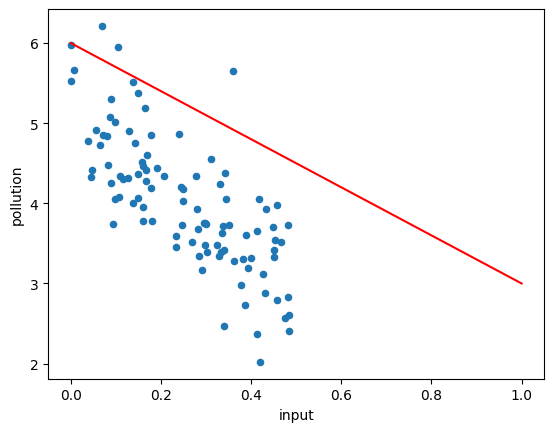

In [29]:
# 새로운 파라미터로 가설(직선)과 데이터(산포도) 비교 
w, b = -3, 6
x0, x1 = 0.0, 1.0

lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)], "r")

### 좋은 가설과 모델의 오차

In [30]:
import numpy as np

y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
squared_error = (y_hat - y)**2
e_mse = squared_error.mean()
e_mse

np.float64(0.06099999999999996)

In [31]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_hat, y))

Mean squared error: 0.06099999999999996


### 4.5 데이터의 관계를 설명하는 선형회귀 함수의 시각적 이해

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):     # w를 바꾸어가며 예측치와 정답의 오차 비교
    y_hat = w * x
    print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


### 4.7 오차로 가설을 평가하고 좋은 가설 찾기

In [33]:
# import matplotlib.pyplot as plt
# import pandas as pd

# data_home = 'https://github.com/dknife/ML/raw/main/data/'
# lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, w, b):
    return w*x + b

w, b = -3, 6  # w,b가  -3, 6일 때 h() 함수를 y^hat 함수로 가정

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

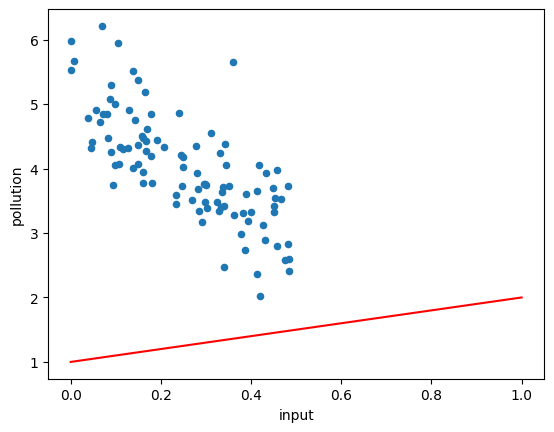

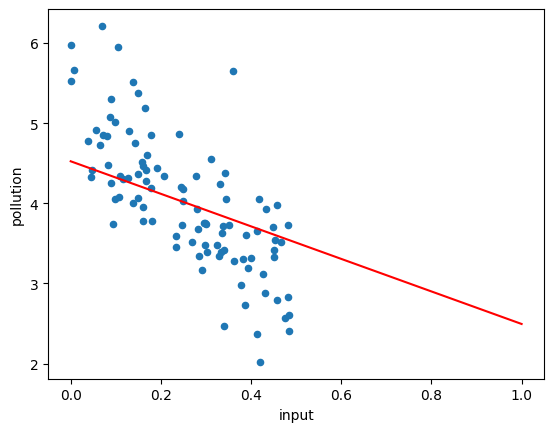

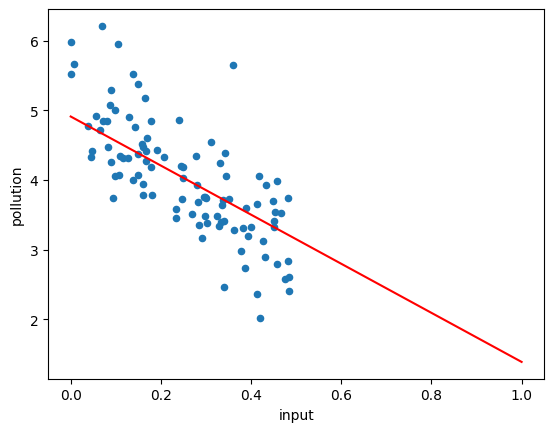

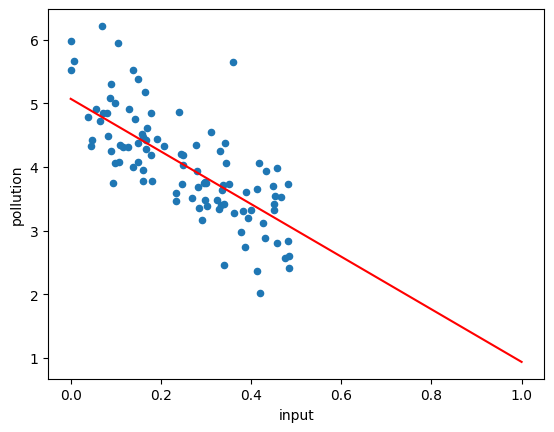

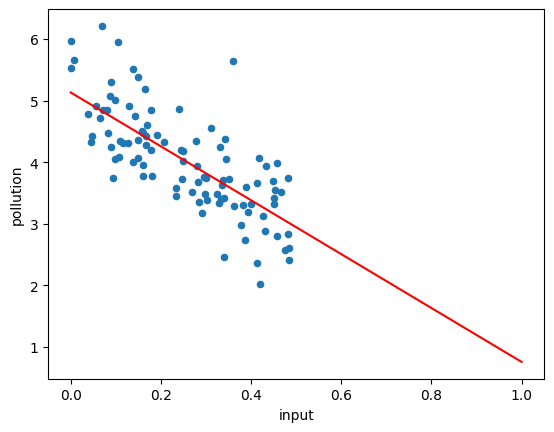

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, param):
    return param[0]*x + param[1]

learning_iteration = 1000 # 하이퍼파라미터 : 학습반복 횟수
learning_rate = 0.0025    # 하이퍼파라미터 : 학습율로 0.05, 0.001등이 가능

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)], 'r')
    error = ( h(x, param) - y )
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

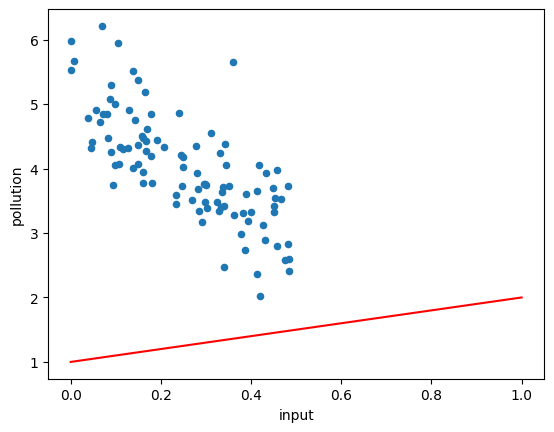

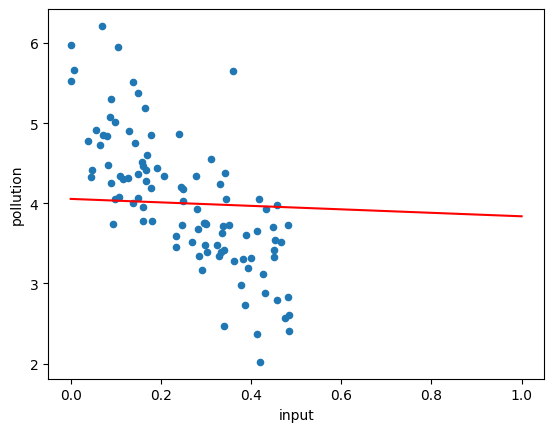

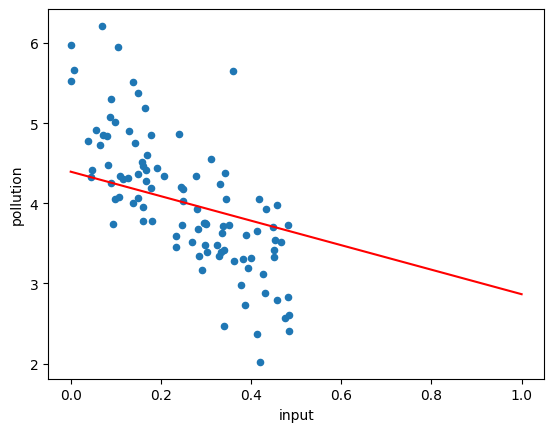

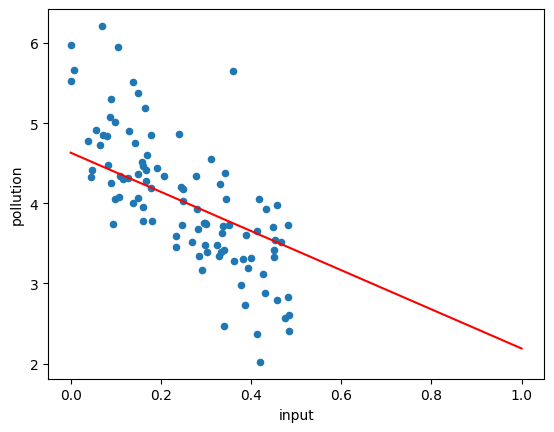

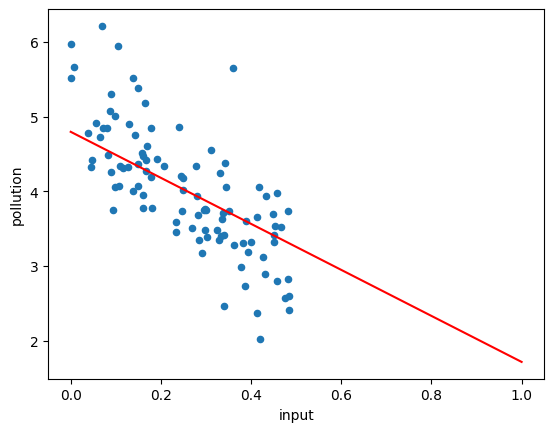

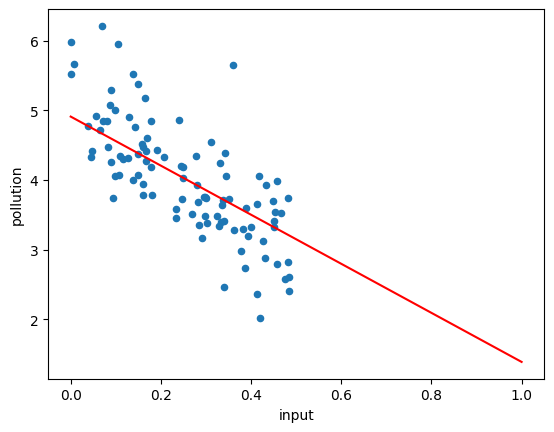

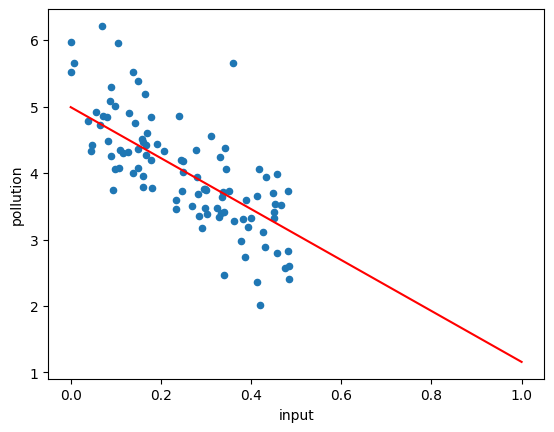

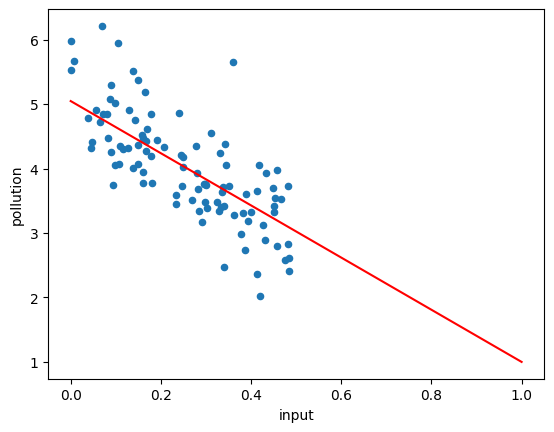

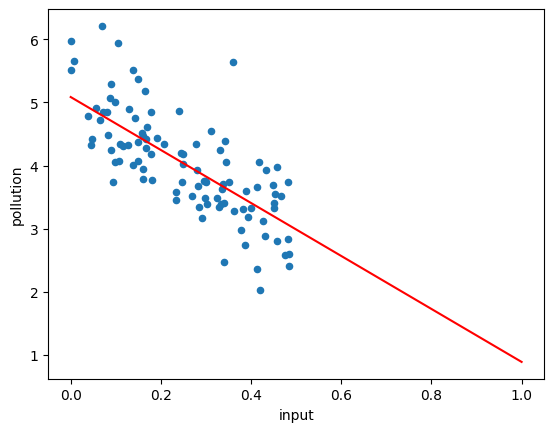

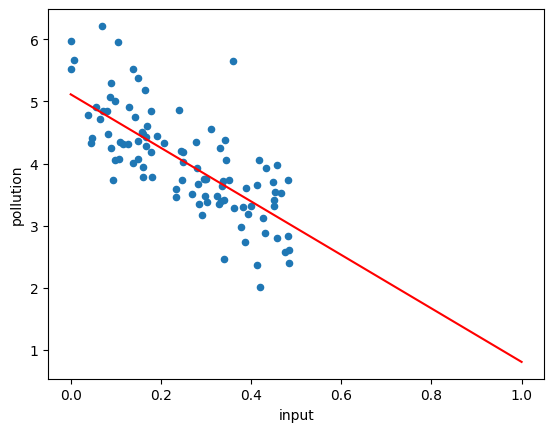

In [35]:
##  learning
learning_iteration = 2000
learning_rate = 0.1

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)], 'r')
    error = ( h(x, param) - y )
#     param[0] -= learning_rate * (error * x).sum() 
#     param[1] -= learning_rate * error.sum()
    param[0] -= learning_rate * (error * x).mean() 
    param[1] -= learning_rate * error.mean()

In [36]:
param[0], param[1]

(np.float64(-4.376632296755487), np.float64(5.1320418836202))

### 4.9 Scikit-Learn을 이용한 선형 회귀

In [39]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

data_home = 'D:/jupyter/Deeplearning/data'
lin_data = pd.read_csv(data_home+'pollution.csv')
# lin_data

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]     # 선형회귀 모델의 입력형식에 맞게 차원을 증가시킴
# print(x)

regr = linear_model.LinearRegression()   
regr.fit(x, y)

print(type(regr))

FileNotFoundError: [Errno 2] No such file or directory: 'D:/jupyter/Deeplearning/datapollution.csv'

NameError: name 'regr' is not defined

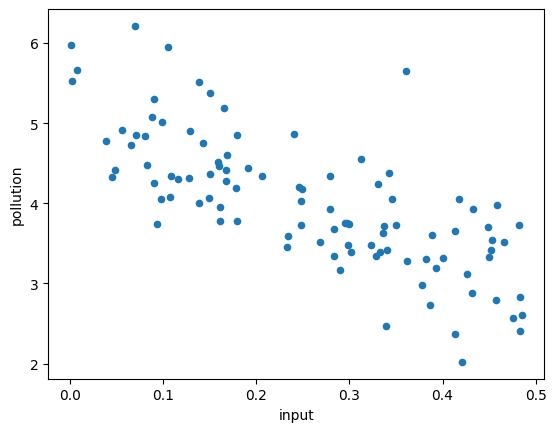

In [44]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
y_pred = regr.predict([[0], [0.6]])
plt.plot([0, 0.6], y_pred, 'r')
plt.show()

In [ ]:
regr?

In [45]:
regr.coef_  # 기울기

NameError: name 'regr' is not defined

In [46]:
regr.intercept_

NameError: name 'regr' is not defined

In [47]:
regr.predict([[0], [1]])  # x = 0과 1에서의 예측값(y_hat)

NameError: name 'regr' is not defined

In [48]:
regr.coef_ * [[0], [1]] + regr.intercept_  # 수동으로 계산한 값 (위와 같음 확인)

NameError: name 'regr' is not defined

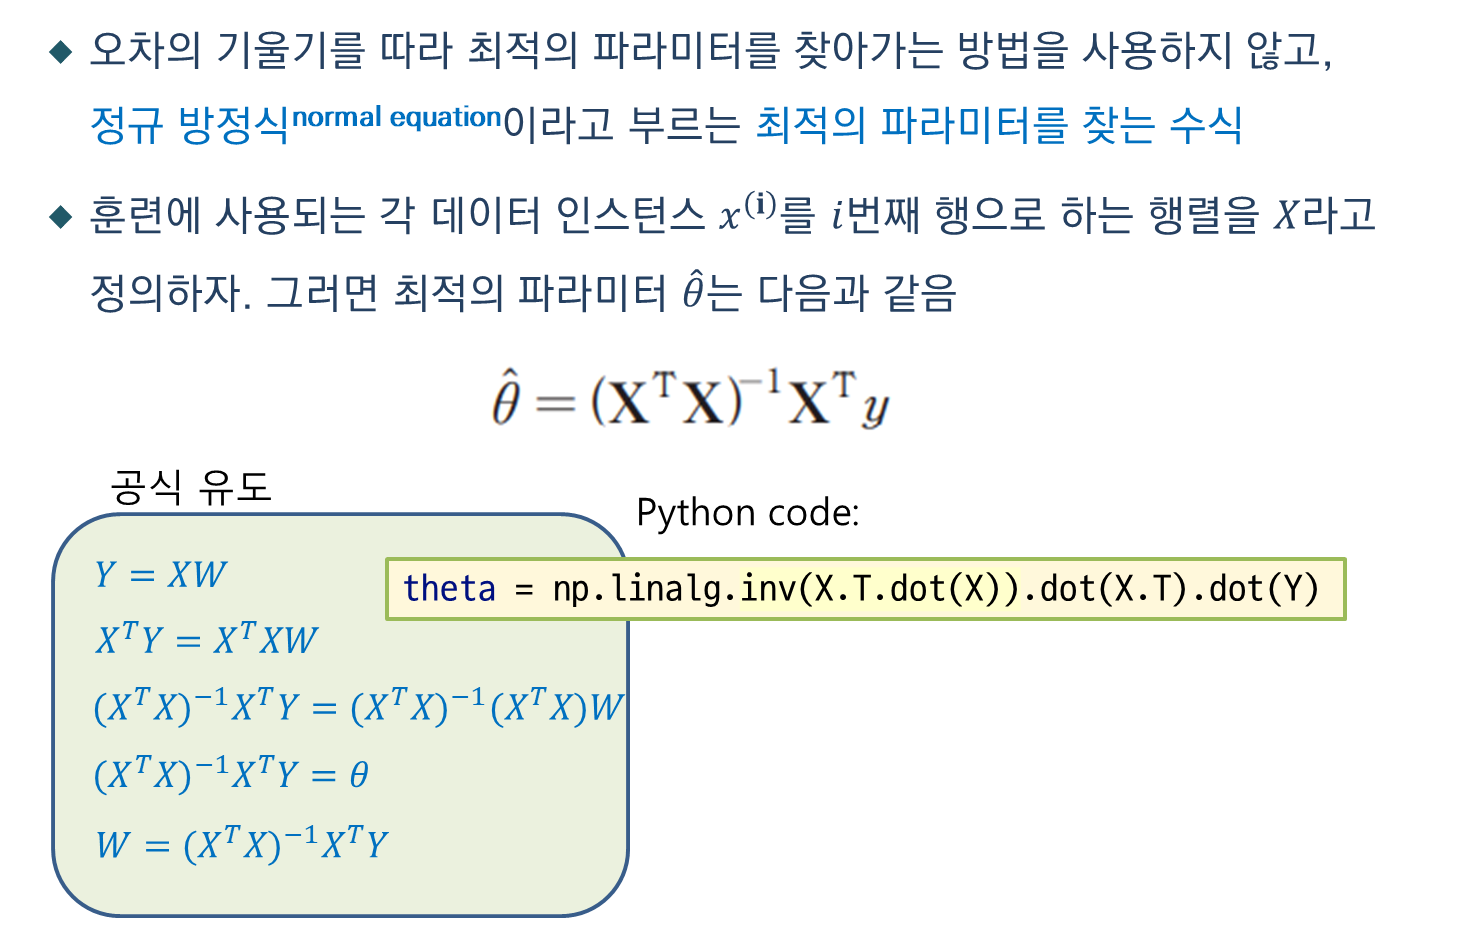

## 편향 bias

In [40]:
lin_data = pd.read_csv('../data/pollution.csv') # 데이터 파일 이름
lin_data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


In [41]:
X = lin_data['input'].values     # shape: (100,)
Y = lin_data['pollution'].values # shape: (100, )
X = X[:, np.newaxis]             # 차원 추가 shape: (100, 1)
X = np.hstack([np.ones((100, 1)), X])  # shape : (100, 2)
print(X)

[[1.00000000e+00 2.40557071e-01]
 [1.00000000e+00 1.59730598e-01]
 [1.00000000e+00 1.08294551e-01]
 [1.00000000e+00 2.33770334e-01]
 [1.00000000e+00 2.83235375e-01]
 [1.00000000e+00 1.28085826e-01]
 [1.00000000e+00 3.45490753e-01]
 [1.00000000e+00 3.32713292e-01]
 [1.00000000e+00 9.00142565e-02]
 [1.00000000e+00 1.16204832e-01]
 [1.00000000e+00 2.06013589e-01]
 [1.00000000e+00 1.50001317e-01]
 [1.00000000e+00 3.92947744e-01]
 [1.00000000e+00 4.20919103e-01]
 [1.00000000e+00 3.30715790e-01]
 [1.00000000e+00 4.81756183e-01]
 [1.00000000e+00 2.68580809e-01]
 [1.00000000e+00 2.32808098e-01]
 [1.00000000e+00 4.57049987e-01]
 [1.00000000e+00 2.45697851e-01]
 [1.00000000e+00 3.82367589e-01]
 [1.00000000e+00 2.98567613e-01]
 [1.00000000e+00 2.99447048e-01]
 [1.00000000e+00 4.48411946e-01]
 [1.00000000e+00 9.89658723e-02]
 [1.00000000e+00 4.79384512e-02]
 [1.00000000e+00 1.59202264e-01]
 [1.00000000e+00 4.17919473e-01]
 [1.00000000e+00 1.60829312e-01]
 [1.00000000e+00 2.48513337e-01]
 [1.000000

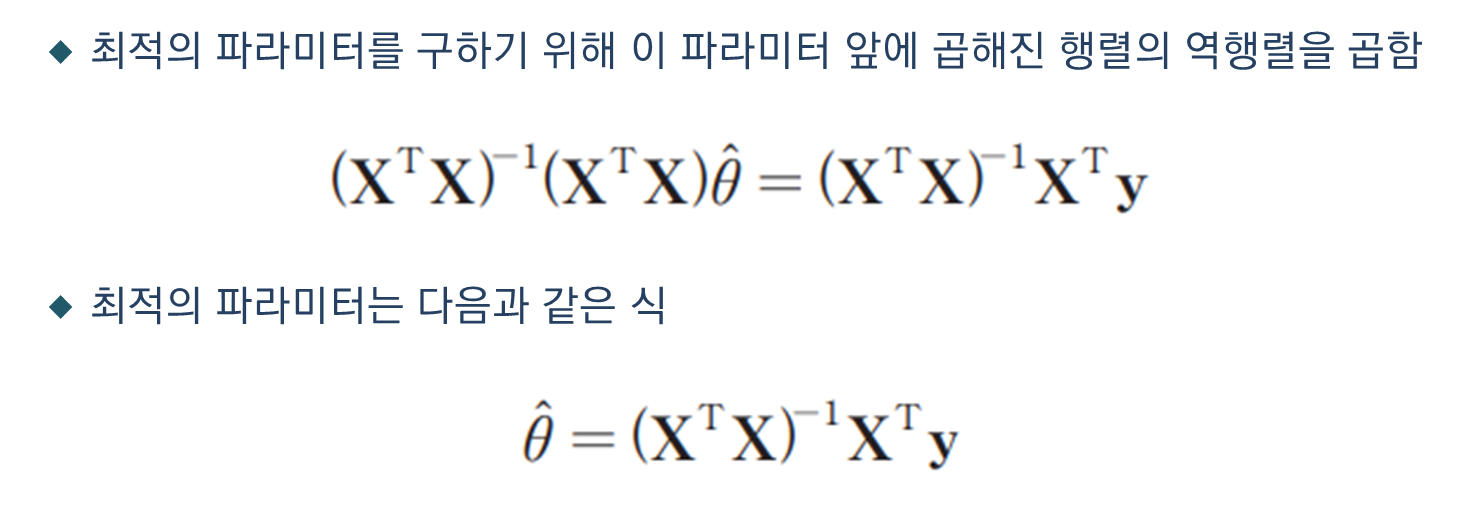

In [42]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # 공식!
theta   # 가중치 쎄타 (W와 동일)는 공식으로 풀 수 있음 

array([ 5.17550358, -4.54449866])

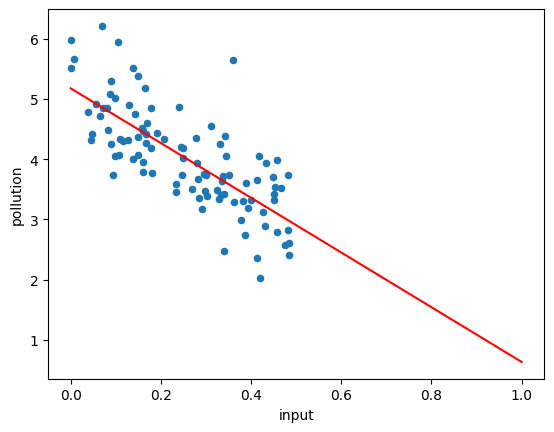

In [43]:
def h(x, theta):        # 가설 함수
    return x*theta[1] + theta[0]


# 데이터와 가설을 비교
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')  # 데이터
plt.plot([0, 1], [h(0, theta), h(1, theta)], 'r')                   # 가설